In [2]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare

In [3]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240927_140036.braidz")
df,csvs["opto"]


Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240927_140036.braidz using pyarrow


(         obj_id    frame     timestamp         x         y         z  \
 0             1    46139  1.727439e+09  0.082663 -0.009540  0.033235   
 1             2    46142  1.727439e+09  0.076957 -0.003901  0.033755   
 2             3    46145  1.727439e+09  0.122295 -0.004836  0.173559   
 3             3    46146  1.727439e+09  0.168705  0.011538  0.376012   
 4             3    46147  1.727439e+09  0.222951  0.027658  0.600102   
 ...         ...      ...           ...       ...       ...       ...   
 8497902   76774  8254937  1.727521e+09 -0.107006 -0.179544  0.005537   
 8497903   76774  8254938  1.727521e+09 -0.107037 -0.179635  0.005567   
 8497904   76774  8254939  1.727521e+09 -0.107075 -0.179731  0.005605   
 8497905   76774  8254940  1.727521e+09 -0.107096 -0.179835  0.005630   
 8497906   76774  8254941  1.727521e+09 -0.107127 -0.179929  0.005661   
 
              xvel      yvel       zvel           P00           P01  \
 0       -2.162945 -2.475093   0.410402  1.276250e-

In [4]:
data1 = extract_stimulus_centered_data(df, csvs["opto"])
list(data1)
AngV1 = data1['angular_velocity']

In [6]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240925_141823.braidz")
df, csvs["opto"]
data2 = extract_stimulus_centered_data(df, csvs["opto"])
list(data2)
AngV2 = data2['angular_velocity']

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240925_141823.braidz using pyarrow


In [7]:
AngV_J72_Gal4 = np.concatenate([AngV1, AngV2])


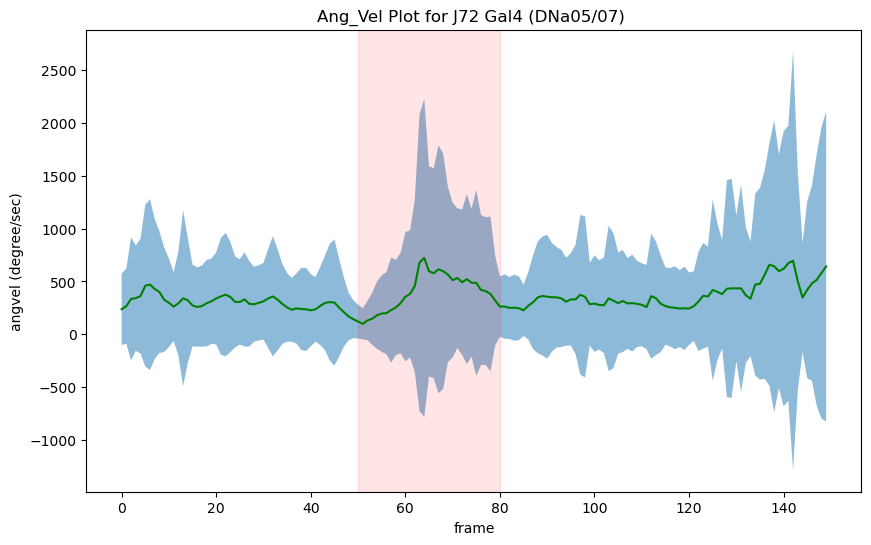

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_mean_and_std(np.abs(AngV_J72_Gal4), ax=ax, label='J74_Gal4 (DNa05/07) (green)', color='green')
ax.set_xlabel("frame")
ax.set_ylabel("angvel (degree/sec)")
ax.set_title("Ang_Vel Plot for J72 Gal4 (DNa05/07) ")

ax.axvspan(50, 80, color='red', alpha=0.1)

plt.show()

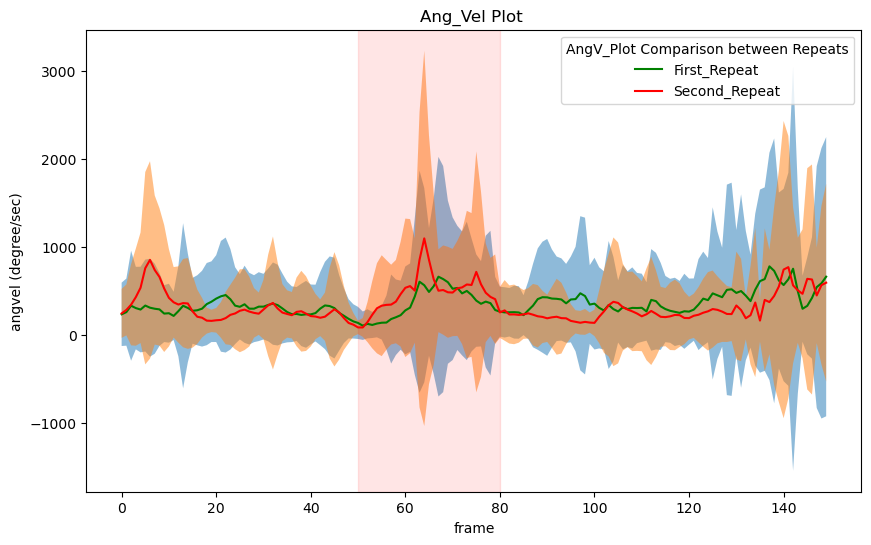

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_mean_and_std(np.abs(AngV1), ax=ax, label='First_Repeat', color='green')
plot_mean_and_std(np.abs(AngV2), ax=ax, label='Second_Repeat', color='red')
ax.set_xlabel("frame")
ax.set_ylabel("angvel (degree/sec)")
ax.set_title("Ang_Vel Plot ")

ax.legend(title="AngV_Plot Comparison between Repeats")
ax.axvspan(50, 80, color='red', alpha=0.1)

plt.show()